<a href="https://colab.research.google.com/github/DaseiN-461/DaseiN-461/blob/main/M%C3%A9todos_de_Runge_Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Euler

In [23]:
def euler(f,x0,y0,paso,xf):
    y = [y0]
    x = [x0]
    h = paso
    n = int((xf-x0)/h)
    for i in range(1,n+1):
        yi = y[(i-1)] + h*f(x[(i-1)],y[(i-1)])
        xi = x[(i-1)] + h
        x.append(xi)
        y.append(yi)
    return x,y

In [28]:
func = lambda x,y: 2*x*y
x,ye = euler(func, 1, 1, 0.1, 1.5)
print(x,ye)

[1, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004] [1, 1.2, 1.464, 1.81536, 2.2873536000000003, 2.927812608000001]


# Método de Euler mejorado

In [26]:
def euler_mejorado(f,x0,y0,paso,xf):
    y = [y0]
    x = [x0]
    h = paso
    n = int((xf-x0)/h)
    for i in range(1,n+1):
        xi = x[i-1]
        yi = y[i-1]
        yim = yi + h*f(xi,yi)
        yi = yi + (h/2)*(f(xi+h,yim)+ f(xi,yi))
        x.append(xi+h)
        y.append(yi)
    return x,y
      

In [27]:
func = lambda x,y: 2*x*y
x,ye = euler_mejorado(func,1,1,0.1,1.5)
print(x,ye)

[1, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004] [1, 1.232, 1.5478848, 1.9831500057600002, 2.5907871675248644, 3.4509285071431197]


# Runge Kutta de cuarto orden

In [29]:
def Runge_Kutta(f,x0,y0,paso,xf):
    y = [y0]
    x = [x0]
    h = paso
    n = int((xf-x0)/h)
    for i in range(1,n+1):
        xi = x[i-1]
        yi = y[i-1]
        k1 = f(xi,yi)
        k2 = f(xi+h/2,yi+1/2*h*k1)
        k3 = f(xi+h/2,yi+1/2*h*k2)
        k4 = f(xi+h,yi+h*k3)
        x.append(xi+h)
        y.append(yi+1/6*h*(k1+2*k2+2*k3+k4))
    return x,y

In [30]:
func = lambda x,y: 2*x*y
x,ye = Runge_Kutta(func,1,1,0.1,1.5)
print(x,ye)

[1, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004] [1, 1.23367435, 1.5526953980477614, 1.9936867693499598, 2.611633233219414, 3.49021063637295]


# Tres Métodos Juntos

ingrese la función: 1
ingrese x0: 0
ingrese y0: 0
ingrese xf: 1
ingrese el tamaño del paso: 0.01


,x,Euler,Euler-M,RK-4
0,0.00,0.00,0.00,0.00
1,0.01,0.01,0.01,0.01
2,0.02,0.02,0.02,0.02
3,0.03,0.03,0.03,0.03
4,0.04,0.04,0.04,0.04
...,...,...,...,...
96,0.96,0.96,0.96,0.96
97,0.97,0.97,0.97,0.97
98,0.98,0.98,0.98,0.98
99,0.99,0.99,0.99,0.99


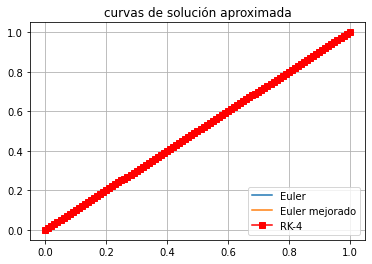

In [47]:
fe = input("ingrese la función: ")  #entrada de la funcion
x0 = float(input("ingrese x0: "))
y0 = float(input("ingrese y0: "))
xf = float(input("ingrese xf: "))
h = float(input("ingrese el tamaño del paso: "))
from pylab import * 
func = lambda x,y: eval(fe)     #para evaluar funciones sencillas desde la entrada

x,yr = Runge_Kutta(func,x0,y0,h,xf)
x,yem = euler_mejorado(func,x0,y0,h,xf)
x,ye = euler(func,x0,y0,h,xf)

plot(x,ye, label = "Euler")
plot(x,yem, label = "Euler mejorado")
plot(x,yr,"rs-", label="RK-4")

legend(loc = 4)
grid()
title("curvas de solución aproximada")

import pandas as pd
df = pd.DataFrame(zip(x,ye,yem,yr), columns = ["x","Euler","Euler-M","RK-4"])
df